# Features Engineering

In this notebook I'll create typical technical analysis features for ML models to be trained in.


In [1]:
%pylab inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import ta

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.volatility import AverageTrueRange

In [3]:
df = pd.read_csv('forex.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
columns_list = df.columns
df

,open,high,low,close,volume
date,,,,,
2011-03-29,1.40860,1.41480,1.40470,1.41130,64044
2011-03-30,1.41130,1.41460,1.40520,1.41260,70281
2011-03-31,1.41270,1.42320,1.41160,1.41740,73492
2011-04-01,1.41730,1.42450,1.40610,1.42340,70943
2011-04-04,1.42310,1.42680,1.41920,1.42180,61094
...,...,...,...,...,...
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751


## Bollinger Bands

In [4]:
indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2)
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm
date,,,,,,,,
2011-03-29,1.40860,1.41480,1.40470,1.41130,64044,NaN,NaN,NaN
2011-03-30,1.41130,1.41460,1.40520,1.41260,70281,NaN,NaN,NaN
2011-03-31,1.41270,1.42320,1.41160,1.41740,73492,NaN,NaN,NaN
2011-04-01,1.41730,1.42450,1.40610,1.42340,70943,NaN,NaN,NaN
2011-04-04,1.42310,1.42680,1.41920,1.42180,61094,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001,1.148816,1.128365,1.138591
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338,1.148648,1.127659,1.138154
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751,1.149253,1.125743,1.137498


In [5]:
#df = dropna(df)
#df

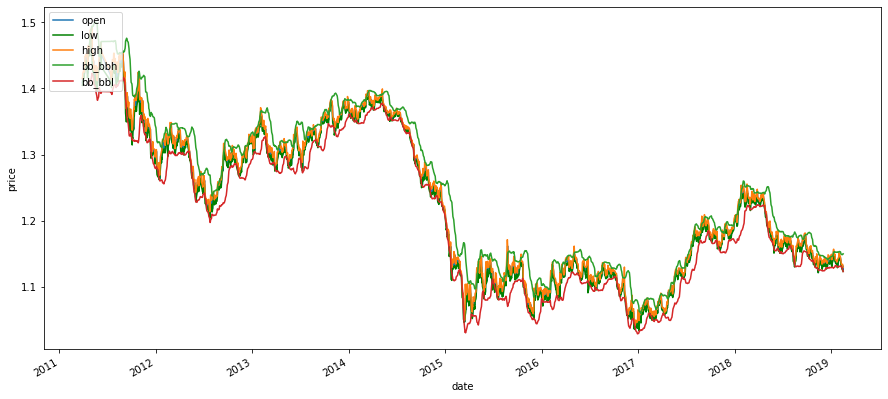

In [7]:
plt.figure(figsize(15,7))
df.open.plot()
df.low.plot(color='g')
df.high.plot()
df.bb_bbh.plot()
df.bb_bbl.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

## Volatility

In [6]:
ATR = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=20)